## **Exploratory data analysis for Classification**

In this lab, we will explore hidden pattern of **Titanic survival data**. This data is sourced from [kaggle](). The folder contain below 4 files:

 + train.csv - the training set
 + test.csv - the test set
 + sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms
(source from kaggle)

Let's start this wonderful and exciting journey.

## **Loading the dataset**

Before we can start visualization, we must load the dataset. At first, we are setting this notebook for analysis. For this, we are going to perform below steps:

 + **Mounting google drive :** As our input files are located in google drive, we are connecting our drive using below code. This step is only required while working in google colab and google drive system.

 + **Importing libraries :** We are importing all importing libraries in this step. In addition to this, we are also printing version of all libraries as it will be useful in future. Below are the list of libraries which we are going to import and use in this lab:

    + For data manipuation : `numpy` and `pandas`
    + For data visulization : `matplotlib` and `seaborn`
    + For setting path : `os`

Notice the IPython "magic" command `%matplotlib inline`. The `%` tells the Python interpreter that this is the start of a magic command; a command which configures the execution environment. The `matplotlib inline` magic indicates that you want to display graphics inline within the notebook. 

 + **Setting path :** We are going to set working directory for this notebook.

 + **Importing the data :** At last, we are going to read the data. For this, we are going to use **read_csv** command from `pandas` package.

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Importing the libraries
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Checking version
print("Version of Numpy :", np.__version__)
print("Version of Pandas :", pd.__version__)
print("Version of matplotlib :", matplotlib.__version__)
print("Version of Seaborn :", sns.__version__)
print("Version of Scipy :", scipy.__version__)

Version of Numpy : 1.17.5
Version of Pandas : 0.25.3
Version of matplotlib : 3.1.3
Version of Seaborn : 0.10.0
Version of Scipy : 1.4.1


In [0]:
# Setting the path
os.chdir("/content/gdrive/My Drive/Data_Science_Python/Module2")

In [0]:
# Importing the data
data = pd.read_csv("./Titanic_train.csv")

## **Exploring the data**

With the dataset loaded, we will now explore some basic properties using summary methods.

First, we will examine the head (first few rows) of the Pandas data frame to gain an idea of the contents by executing the code in the cell below

In [10]:
# Top 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [12]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q


Now, let's check how many number of rows and columns are present in this dataset by using `shape` attribute of data.

In [13]:
# Shape of data
print("No of rows and columns in data :", data.shape)

No of rows and columns in data : (891, 12)


To better understand the data types in this dataset we are going to check variable type for each variable using `dtypes` attribute of each column.

In [14]:
# Variable information
print("Variable Structure of data :")
print(" ")
data.dtypes

Variable Structure of data :
 


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## **Univariate analysis**

### **Descriptive Statistics**

#### **Target variable : Survive**

First thing first, let's understand target variable.

Distribution of Survived
 
0    549
1    342
Name: Survived, dtype: int64
 
0   0.62
1   0.38
Name: Survived, dtype: float64


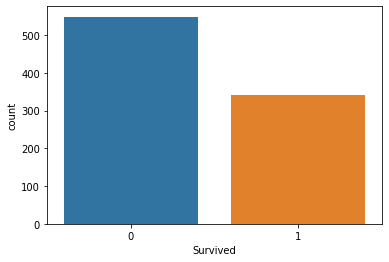

In [15]:
# Descriptive statistics summary : Survive
print("Distribution of Survived")
print(" ")
print(data['Survived'].value_counts())
print(" ")
print(data['Survived'].value_counts(normalize = True))

sns.countplot(data['Survived']);

#### **Features : Numeric**
We are going to create a detailed descriptive statistics report for numeric variables by creating a function using below steps:

 1. Drop Id columns as this is an indicator variable.
 2. Create descriptive statistics report using `describe` method. For easy visulization, let's transpose this report using `transport` method. Further, we are going to use `reset_index` method for future reference. 
 3. Rename the column for larger audience as describe provides statistical names which may be not understood very easily.
 4. Calculate the missing percentage for each variable.
 5. Rearrange the columns.
 6. Calculate another useful statistics IQR.

Execute this function and save this in one dataset. Export this in .csv format for future reference.

In [0]:
# descriptive statistics function
def descriptive_stats_numeric(data):
  
  # Descriptive statistics
  descriptive_statistics = pd.DataFrame(data.drop(['PassengerId'],axis = 1).describe().transpose()).reset_index()
  # Renaming columns
  descriptive_statistics.columns = ['Variable', 'Count', 'Average', 'Std dev', 'Minimum', '1st quartile',
                                  'Median', '3rd quartile', 'Maximum']
  # Missing Percentage summary
  descriptive_statistics['Missing Percent'] = 100 - round(descriptive_statistics['Count']/len(data)*100,2)
  # Calculating IQR
  descriptive_statistics['IQR'] = descriptive_statistics['3rd quartile'] - descriptive_statistics['1st quartile']

  # CV
  descriptive_statistics['CV'] = descriptive_statistics['Std dev']/descriptive_statistics['Average']
  # Unique summary
  unique_summary = pd.DataFrame(data.nunique()).reset_index()
  unique_summary.columns = ['Variable', 'Unique Counts']
  
  # skewness and kurtosis summary
  Skewness = pd.DataFrame(data.skew()).reset_index()
  Skewness.columns = ['Variable', 'Skewness']

  Kurtosis = pd.DataFrame(data.kurt()).reset_index()
  Kurtosis.columns = ['Variable', 'Kurtosis']

  descriptive_statistics = pd.merge(descriptive_statistics, unique_summary, on = 'Variable', how = 'left')
  descriptive_statistics = pd.merge(descriptive_statistics, Skewness, on = 'Variable', how = 'left')
  descriptive_statistics = pd.merge(descriptive_statistics, Kurtosis, on = 'Variable', how = 'left')

  # Rearranging columns
  descriptive_statistics = descriptive_statistics[['Variable', 'Count', 'Unique Counts','Missing Percent', 
                                                   'Minimum', 'Maximum', 'Average', 'Std dev', 'CV', 'Skewness',
                                                   'Kurtosis', 'Median','1st quartile','3rd quartile', 'IQR']]
  return descriptive_statistics

In [17]:
descriptive_statistics_numeric = descriptive_stats_numeric(data)
descriptive_statistics_numeric.to_csv("./Output/Titanic_descriptive_statistics_numeric.csv", index = False)
descriptive_statistics_numeric

,Variable,Count,Unique Counts,Missing Percent,Minimum,Maximum,Average,Std dev,CV,Skewness,Kurtosis,Median,1st quartile,3rd quartile,IQR
0,Survived,891.00,2,0.00,0.00,1.00,0.38,0.49,1.27,0.48,-1.78,0.00,0.00,1.00,1.00
1,Pclass,891.00,3,0.00,1.00,3.00,2.31,0.84,0.36,-0.63,-1.28,3.00,2.00,3.00,1.00
2,Age,714.00,88,19.87,0.42,80.00,29.70,14.53,0.49,0.39,0.18,28.00,20.12,38.00,17.88
3,SibSp,891.00,7,0.00,0.00,8.00,0.52,1.10,2.11,3.70,17.88,0.00,0.00,1.00,1.00
4,Parch,891.00,7,0.00,0.00,6.00,0.38,0.81,2.11,2.75,9.78,0.00,0.00,0.00,0.00
5,Fare,891.00,248,0.00,0.00,512.33,32.20,49.69,1.54,4.79,33.40,14.45,7.91,31.00,23.09


#### **Features : Categorical**

Similar to above report, we are going to create a detailed descriptive statistics report for categorical variables by creating a function using below steps:

 1. Drop Id columns as this is an indicator variable.
 2. Create descriptive statistics report using `describe` method by specifying `include = 'object'` option. For easy visulization, let's transpose this report using `transport` method. Further, we are going to use `reset_index` method for future reference. 
 3. Rename the columns.
 4. Calculate the missing percentage for each variable.
 5. Rearrange the columns.

Execute this function and save this in one dataset. Export this in .csv format for future reference.

In [0]:
#Categorical data
def descriptive_stats_categorical(data):

  # Descriptive statistics
  descriptive_statistics_cat = pd.DataFrame(data.describe(include = 'object').transpose()).reset_index()
  # Renaming columns
  descriptive_statistics_cat.columns = ['Variable', 'Count', 'Unique categories', 'Top Categories',
                                        'Top Categories_count']
  # Missing Percentage summary
  descriptive_statistics_cat['Missing Percent'] = 100 - descriptive_statistics_cat['Count']/len(data)*100

  # Unique summary
  unique_summary = pd.DataFrame(data.nunique()).reset_index()
  unique_summary.columns = ['Variable', 'Unique Counts']

  descriptive_statistics_cat = pd.merge(descriptive_statistics_cat, unique_summary, on = 'Variable', how = 'left')
  # Rearranging columns
  descriptive_statistics_cat = descriptive_statistics_cat[['Variable', 'Count', 'Unique Counts', 
                                                           'Missing Percent', 'Unique categories',
                                                           'Top Categories','Top Categories_count']]
  return descriptive_statistics_cat

In [19]:
descriptive_statistics_cat = descriptive_stats_categorical(data)
descriptive_statistics_cat.to_csv("./Output/descriptive_statistics_category.csv", index = False)
descriptive_statistics_cat

,Variable,Count,Unique Counts,Missing Percent,Unique categories,Top Categories,Top Categories_count
0,Name,891,891,0.00,891,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",1
1,Sex,891,2,0.00,2,male,577
2,Ticket,891,681,0.00,681,CA. 2343,7
3,Cabin,204,147,77.10,147,C23 C25 C27,4
4,Embarked,889,3,0.22,3,S,644


Now, we will consider we you can understand the distributions of categorical variables more detail. Using a single line of Pandas code allows us to compute and display a frequency table using the `value_counts` method. A frequency table shows the frequency of each unique category of a categorical variable.

The code in the cell prints frequency table for a list of categorical columns.

In [0]:
# Function for freq summary
def count_unique(data, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(data[col].value_counts())

cat_cols = data.select_dtypes(include=['object']).columns.tolist()
count_unique(data, cat_cols)


For column MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

For column Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

For column Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64

For column LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

For column LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

For column Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

For column LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

For column LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

For column Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     

 1. Some of these variables have a large number of categories. When performing machine learning with a limited size training dataset, having a large number of categories is problematic, since there will be few samples per category. For example, notice how many **Neighborhood** are represented. There is only 9 NPkVill and 2 Blueste. Thus, any statistical property for these categories will be poorly determined.

 2. There are significant imbalances in the counts of most of categories. We have already seen that there are significant differences in the counts by **Neighborhood**. Similar pattern can be observed for rest variables.

This analysis also help us whether there is any need for converting any categorical variable into numeric variable. In most cases, we will convert in below cases:

 + Some categorical variables indicate rank, for example large, medium and small. In these cases, it may be better to transform these values to numeric levels.

 + Just as it might be useful to transform a categorical variable to numeric, it may be advantageous to convert a numeric variable to a categorical variable. This is particularly the case if the numeric values are simply coding for a category with no particular meaning.


### **Visualizing distributions**

Python supports the `matplotlib` library; which provides extensive graphical capabilities.  Additionally, the Python `Pandas` and the `Seaborn` library add a higher level graphics capability. `Pandas` and `Seaborn` abstract a lot of the low level details. As we will see, since these libraries are based on `Matplotlib`, we can always add needed details. Using visualizations, we can explore relationships between the data features. Further we can also identify features that may be useful for predicting labels.

With some basic understanding of the data set in mind, it is time to dig a bit deeper. In this section we will apply methods to explore the distributions of categorical and numeric data.

#### **Bar charts**

As a first step, we will use **bar charts** to examine the frequency distributions of categorical variables. A bar chart displays frequencies of each category. For this, we are creating a function to perform the following processing:
 
 1. Iterates over the list of columns.
 2. The figure and axes are  defined using Matplotlib methods. 
 3. The counts or frequencies of the categories are computed.
 4. The bar plot is created using the Pandas `plot.bar` method. Notice that the color argument is set to blue. The default to used **multiple colors for no reason whatsoever is distracting and does not add to interpretation**.
 5. Annotations are added to the plot using Matplotlib methods.

Since `Pandas` plotting is built on `Matplotlib`, it is always possible to add additional plot attributes using methods in this package.

In [0]:
def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,5)) # define plot area
        ax = fig.gca() # define axis    
        counts = data[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame

        ax.set_title('Number of houses by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of houses')# Set text for y axis
        plt.show()

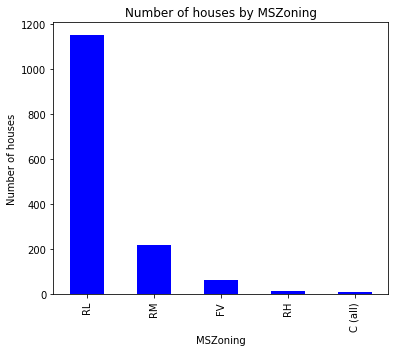

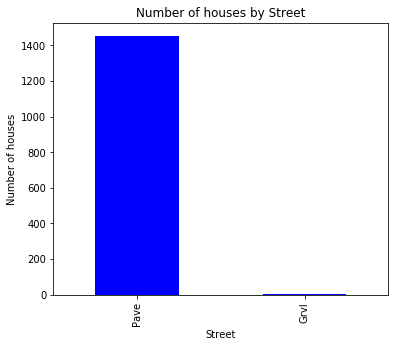

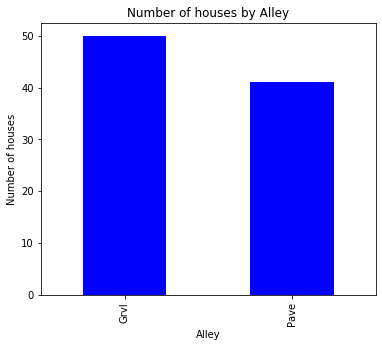

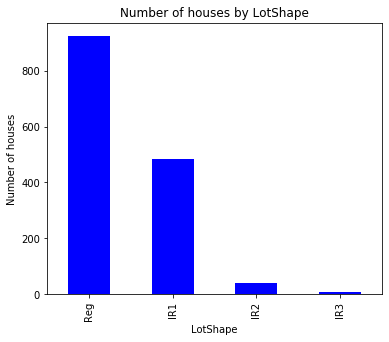

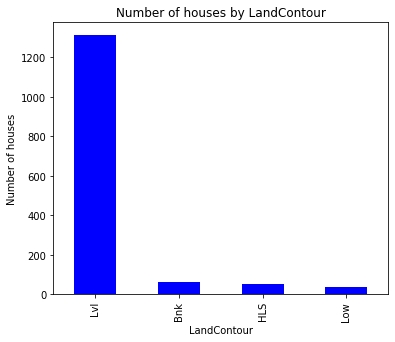

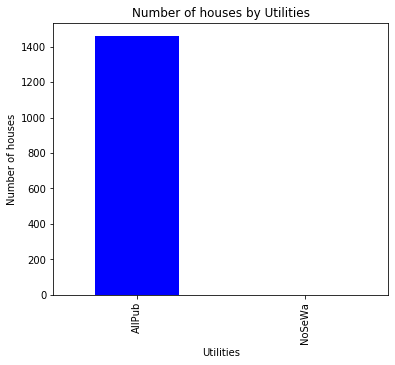

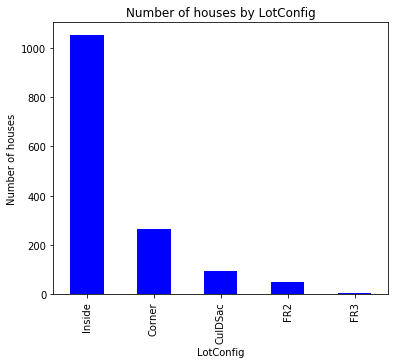

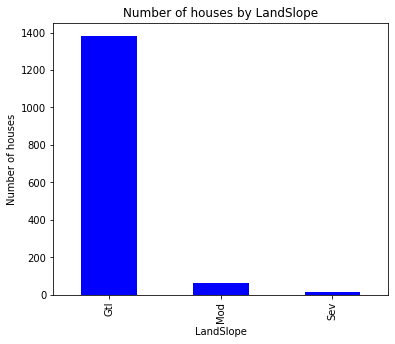

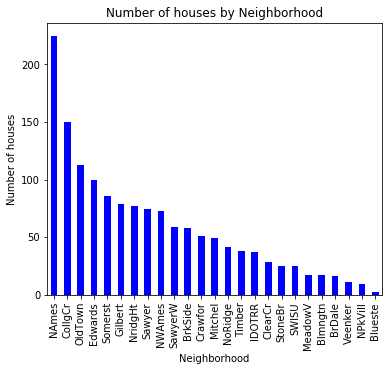

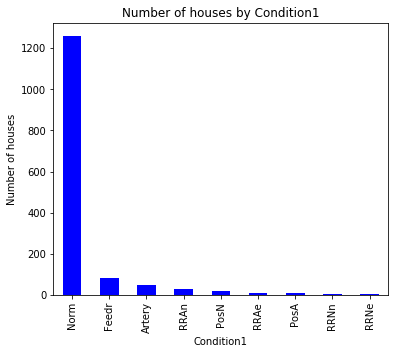

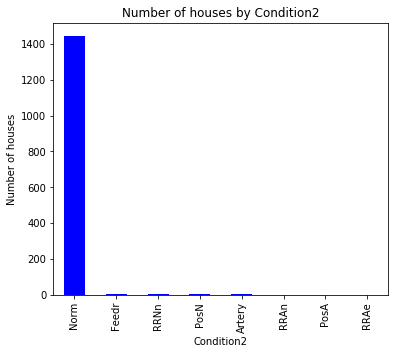

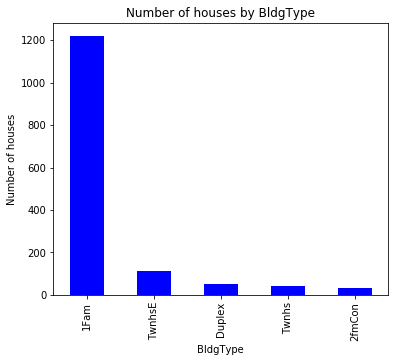

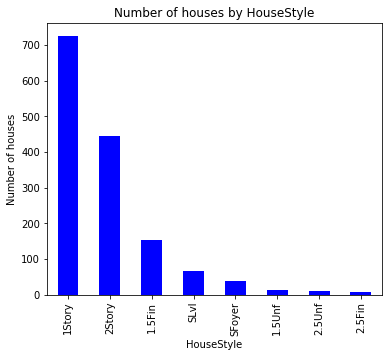

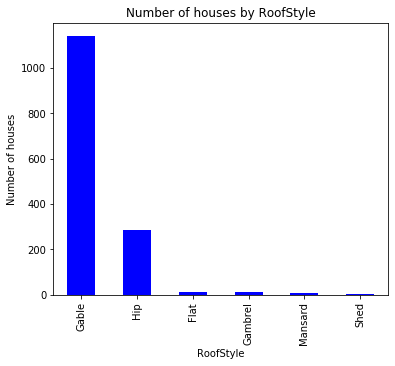

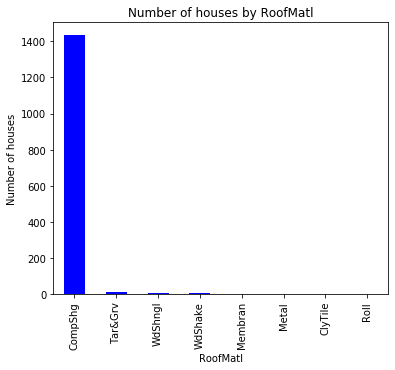

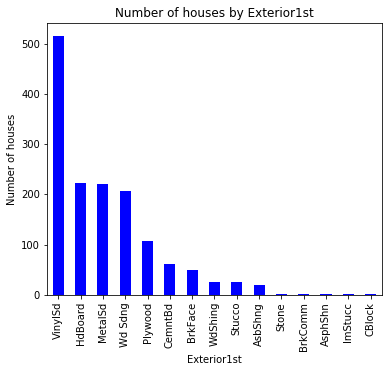

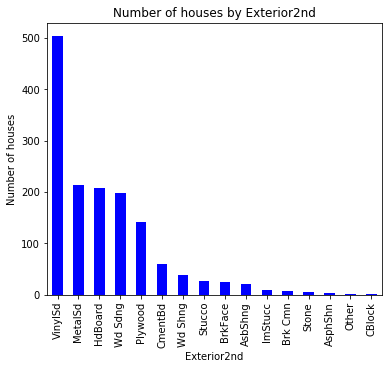

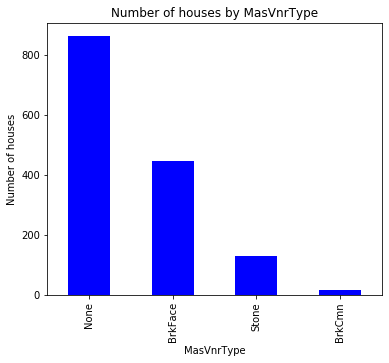

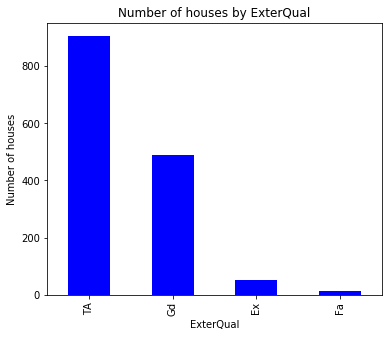

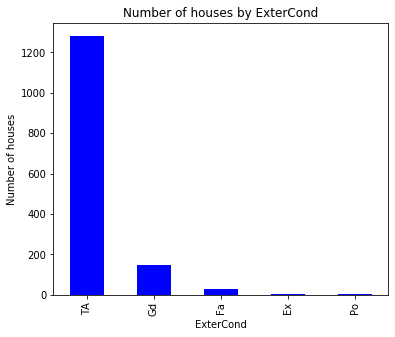

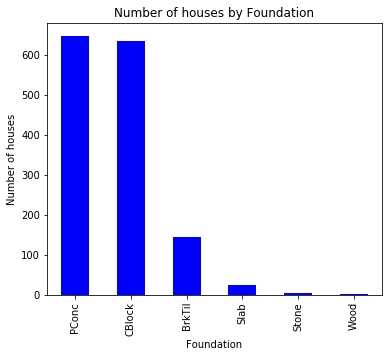

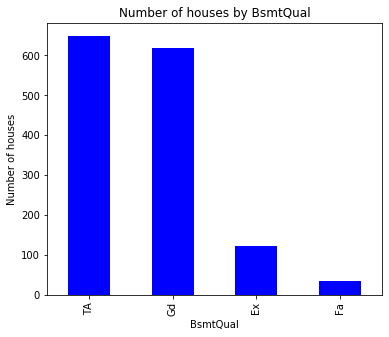

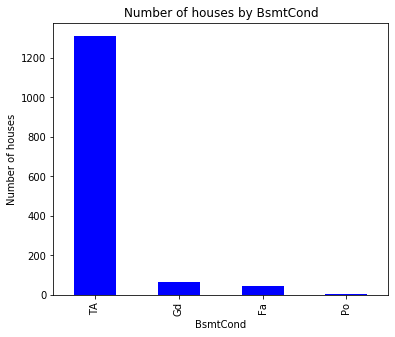

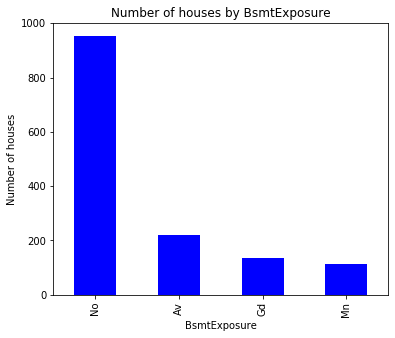

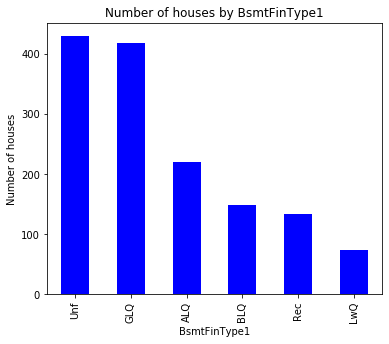

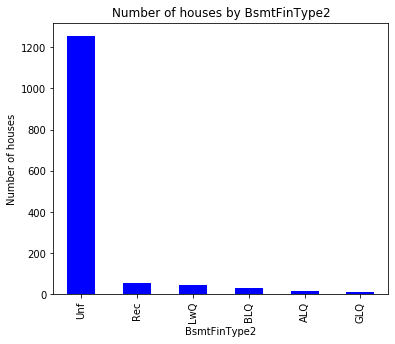

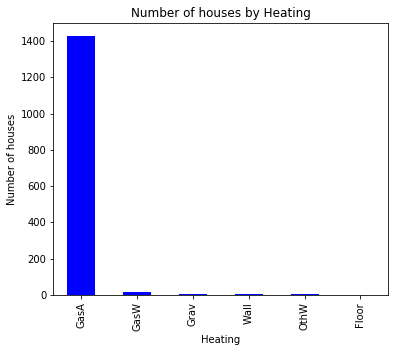

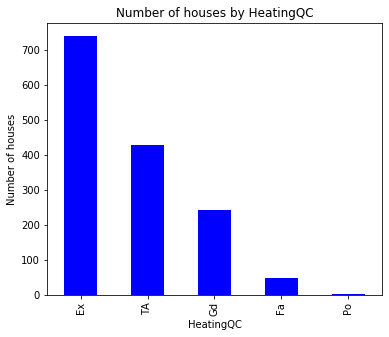

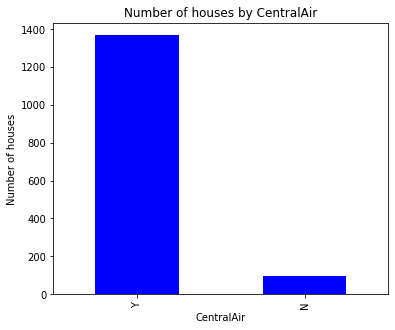

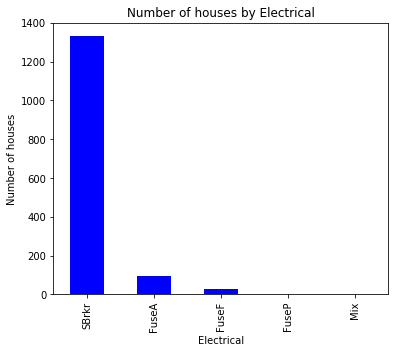

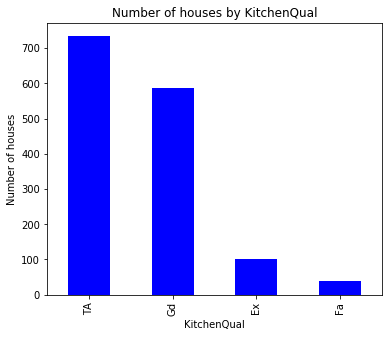

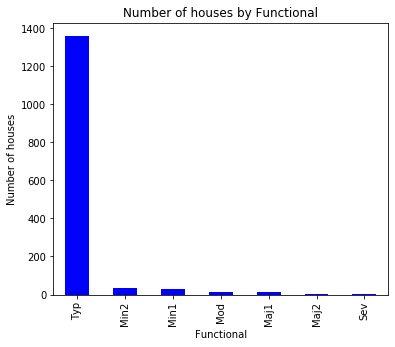

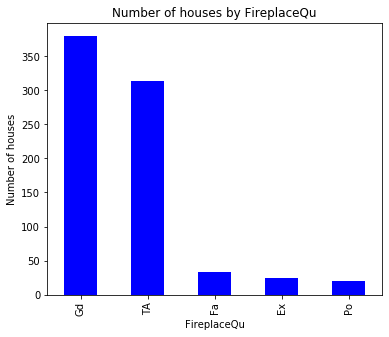

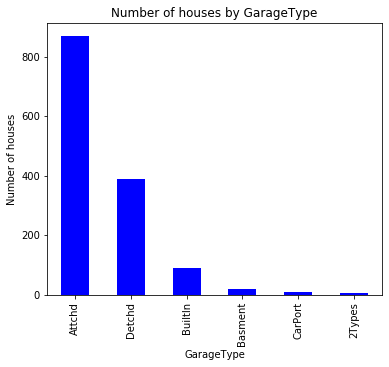

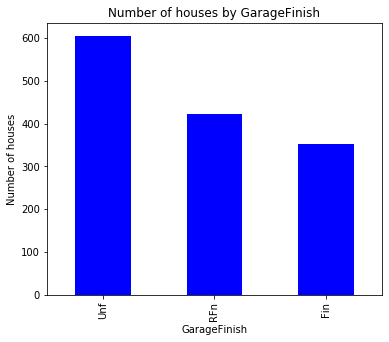

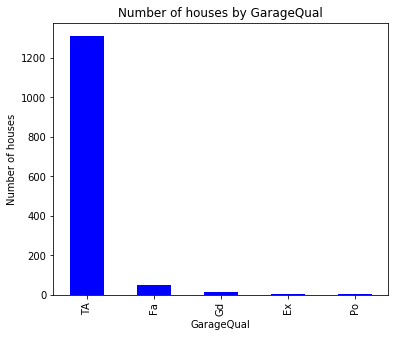

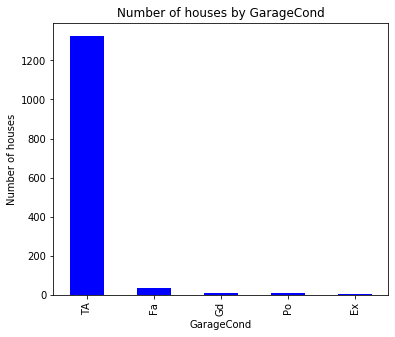

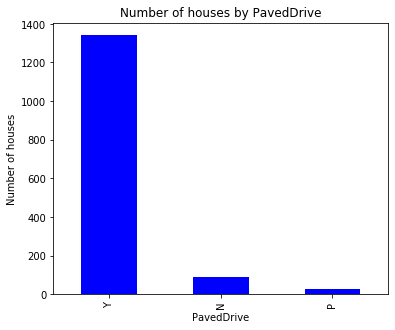

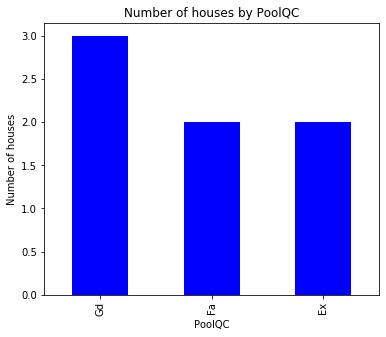

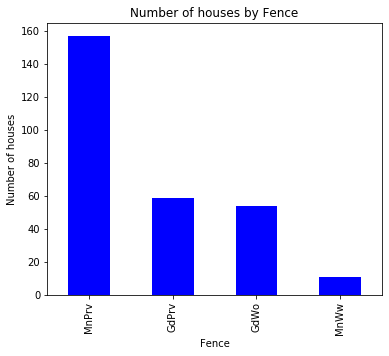

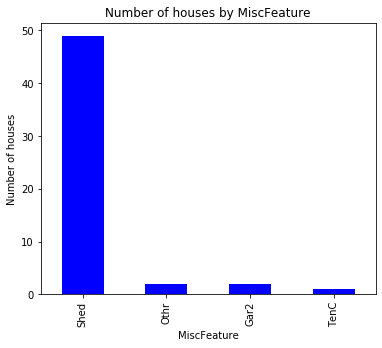

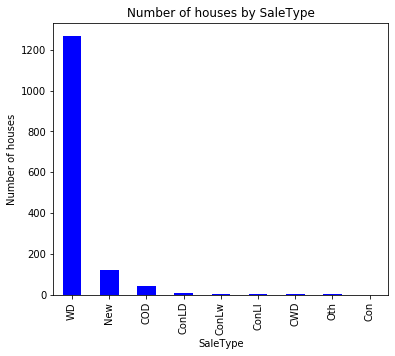

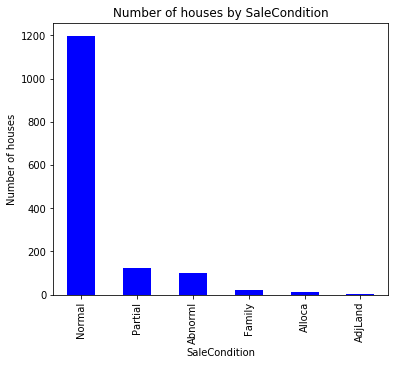

In [0]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
plot_bars(data, cat_cols)

#### **Histograms**

**Histograms** are related to bar plots. Whereas, a bar plot shows the counts of unique categories, a histogram shows the **number of data values within a bin** for a **numeric variable**. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the count of data values within each bin.  

The code below follows the same basic recipe used for the bar plot to create a histogram. In this case, the Pandas `plot.hist` method is used.

In [0]:
def plot_histogram(data, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,5)) # define plot area
        ax = fig.gca() # define axis    
        data[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of houses')# Set text for y axis
        plt.show()

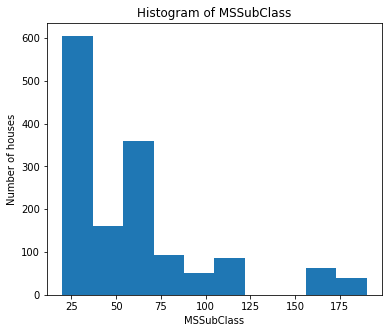

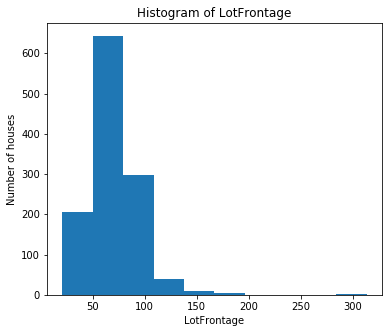

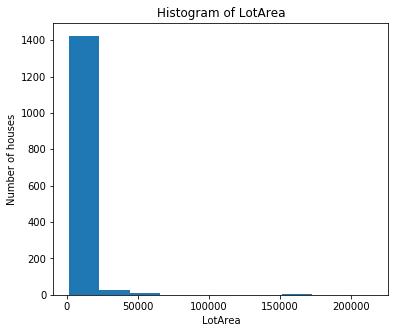

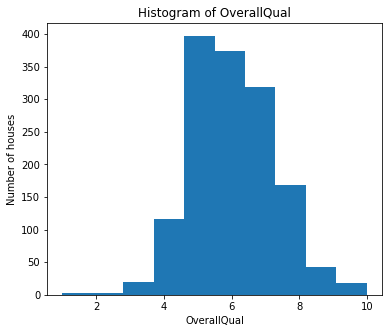

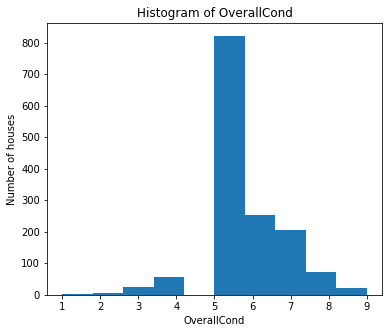

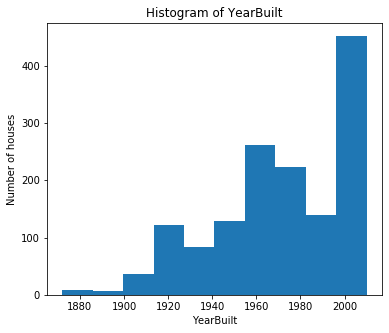

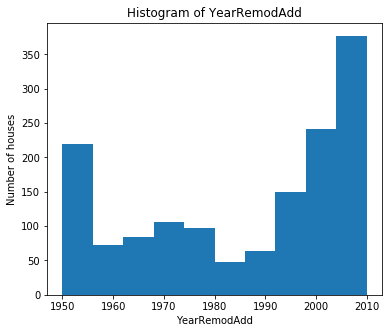

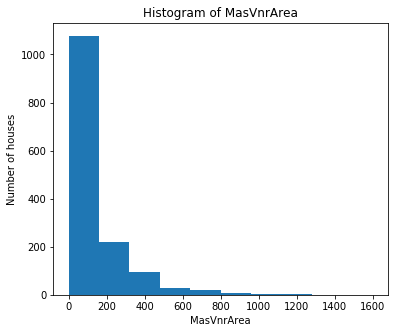

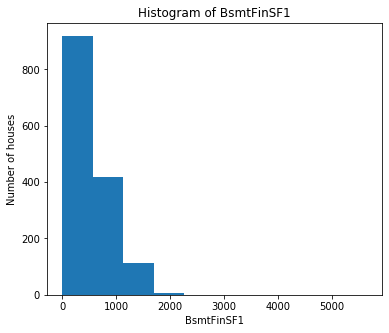

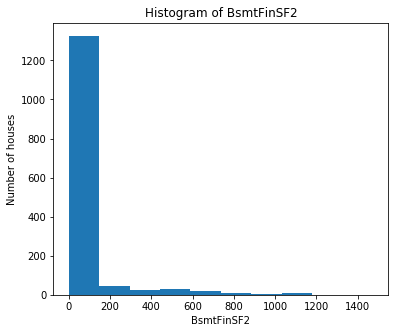

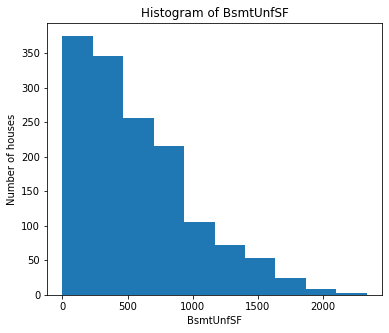

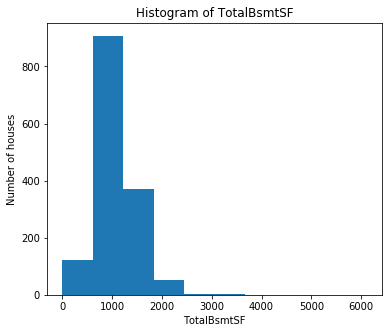

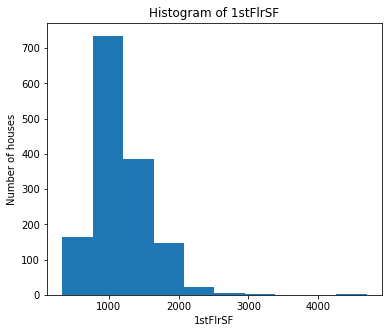

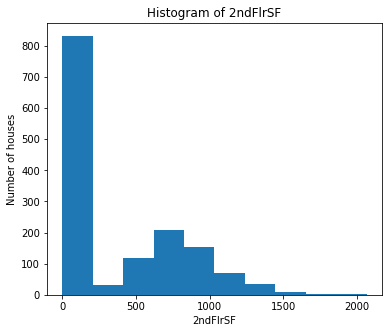

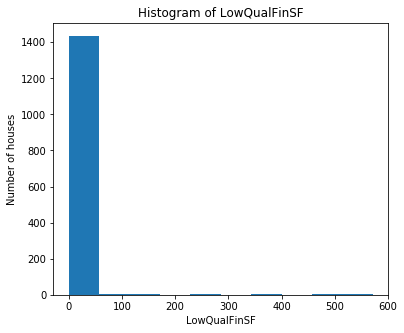

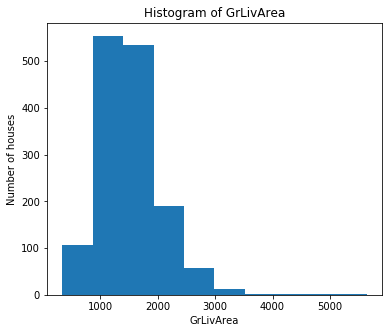

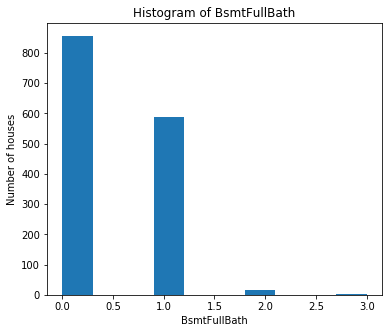

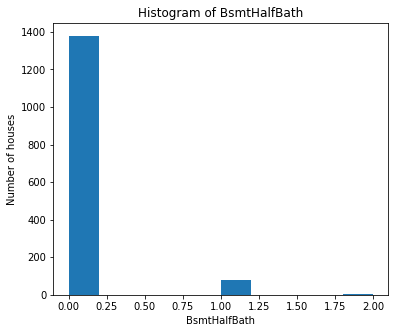

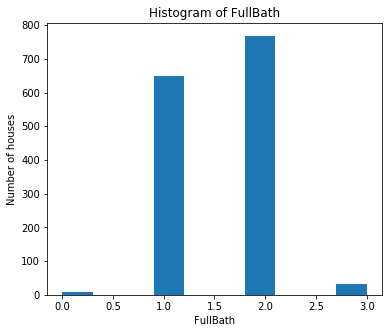

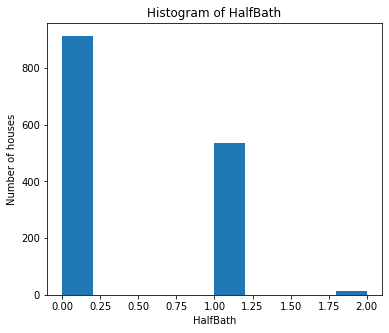

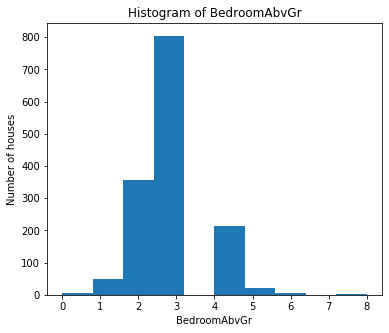

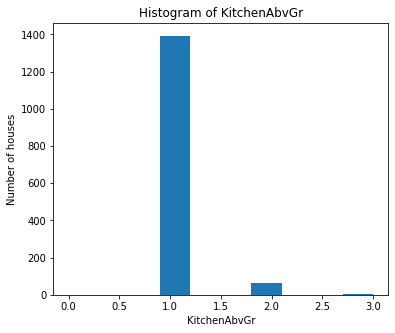

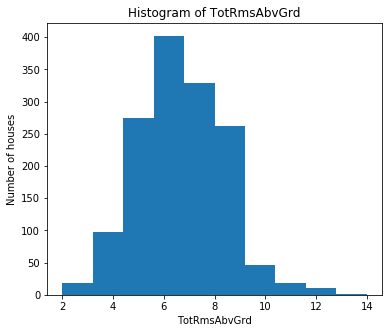

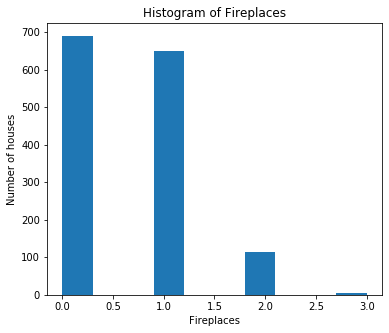

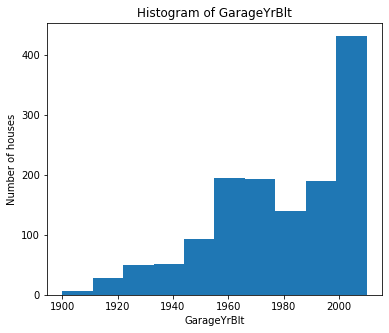

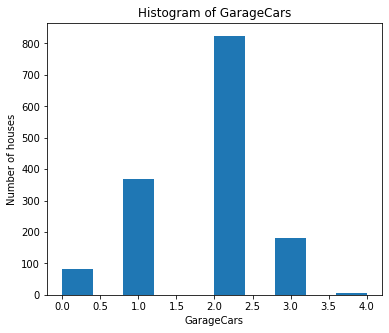

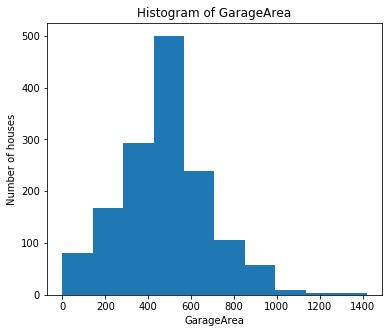

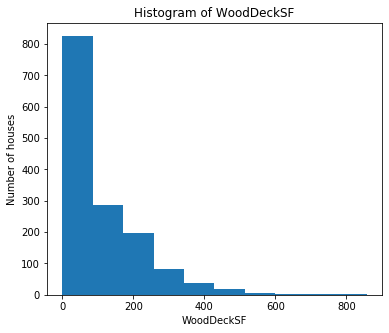

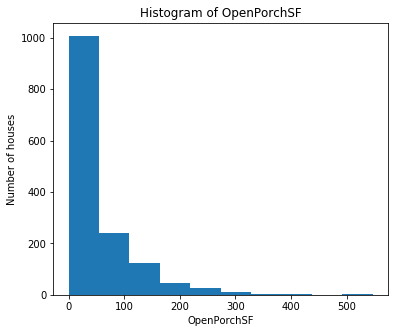

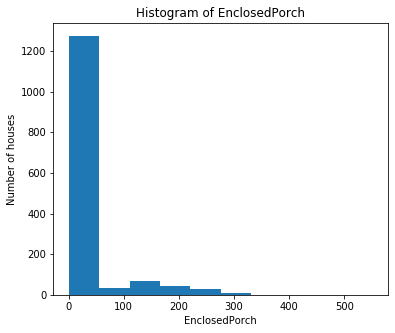

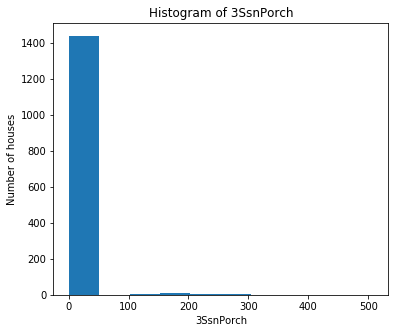

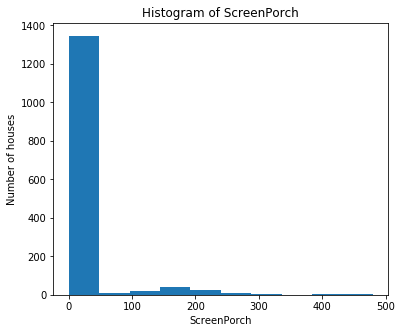

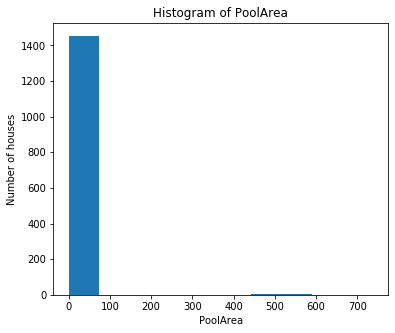

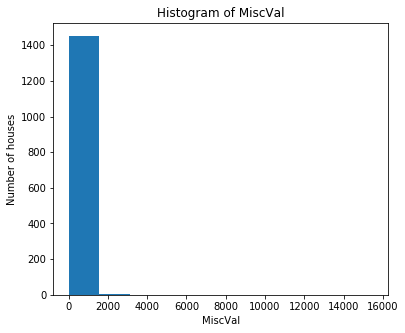

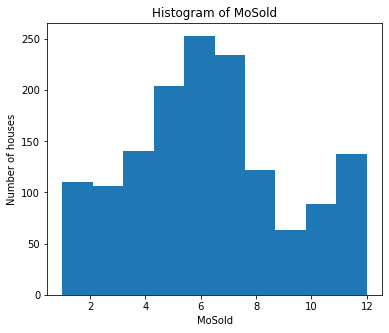

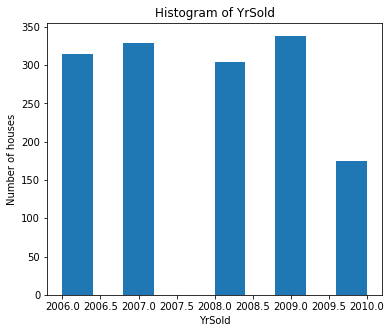

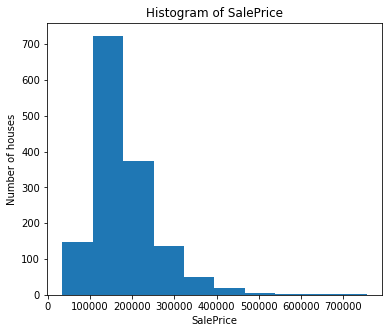

In [0]:
num_cols = data.drop(['Id'], axis = 1).select_dtypes(include=['int', 'float']).columns.tolist()    
plot_histogram(data, num_cols)

#### **Kernel density plots**

**Kernel density estimation** or **kde** plots are similar in concept to a histogram. A kernel density plot displays the values of a smoothed density curve of the data values. In other words, the kernel density plot is a smoothed version of a histogram.
 
The code in the cell below creates a kernel density plot following the recipe used before but instead of `Pandas`,we are going to use another package `Seaborn`. Using `Seaborn` adds the following to the recipe:

 1. Set a style for the plot grid.
 2. Define the plot type with `distplot` using the engine-size column as the argument. In this case, no histogram is plotted. A 'rug' showing the locations of the data points on the axis is displayed along the horizontal axis.
 3. Once again, `Matplotlib` methods are used to add the annotations to the plot. `Seaborn` is built on `Matplotlib`, so it is always possible to mix `Matplotlib` methods.

****
**Note:** Depending on our platform and versions of `numpy`, we may see a deprecation warning. We can safely ignore this warning. 
****

In [0]:
def plot_density_hist(data, cols, bins = 10, rug=False, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(data[col], bins = bins, rug=rug, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of houses')# Set text for y axis
        plt.show()

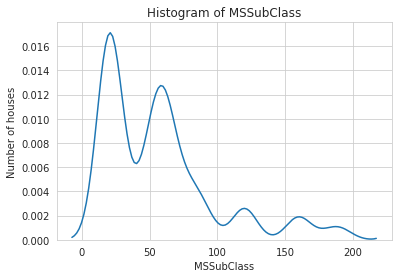

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


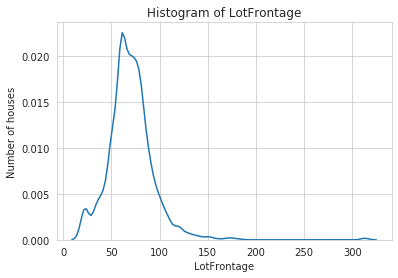

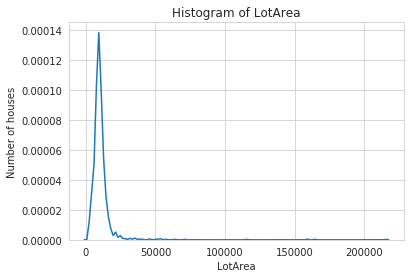

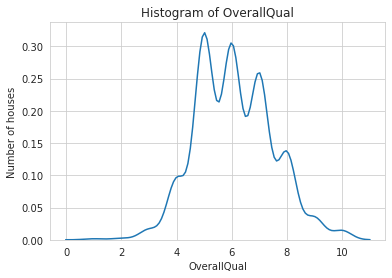

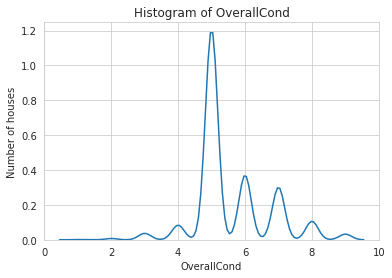

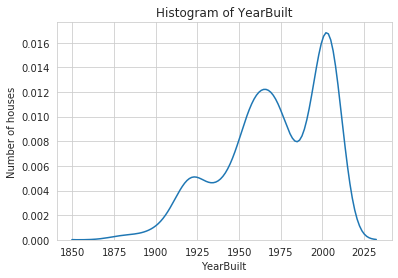

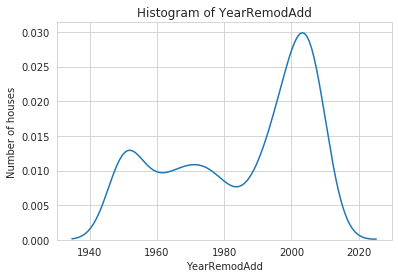

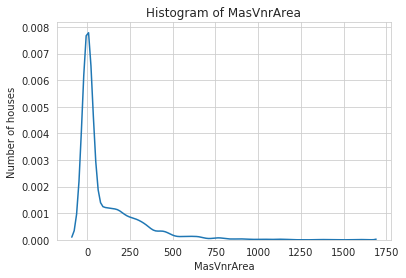

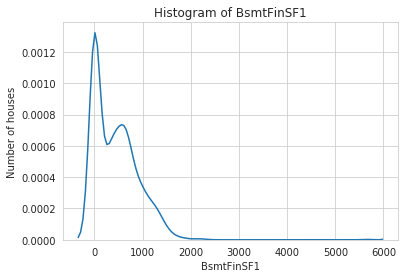

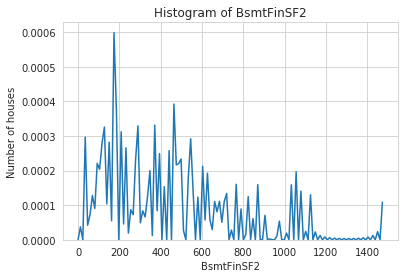

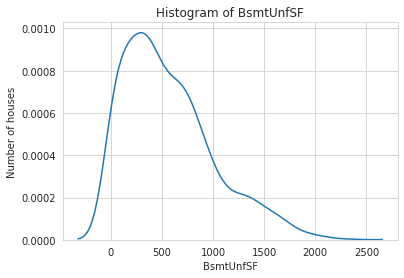

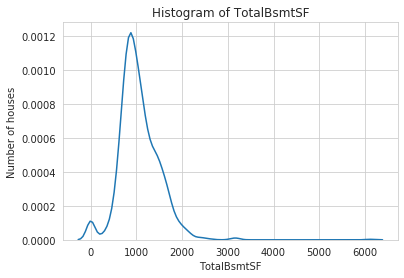

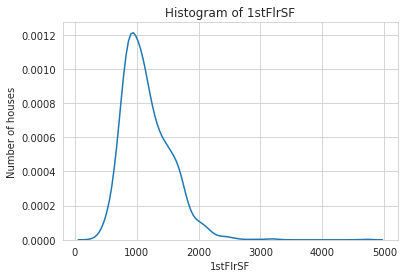

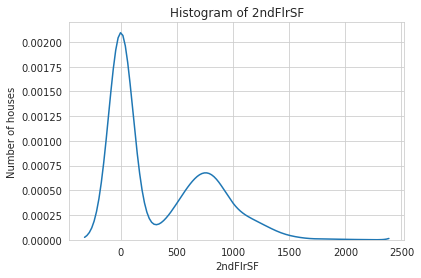

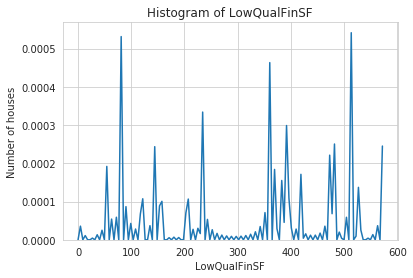

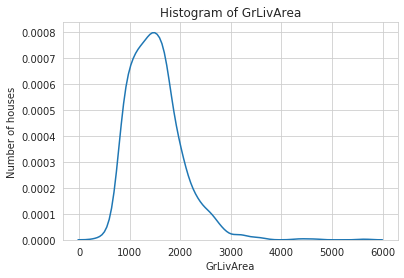

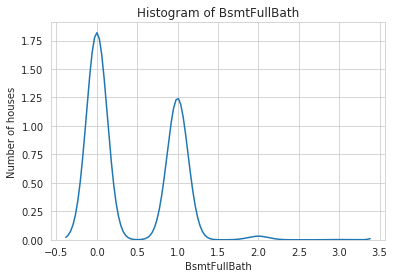

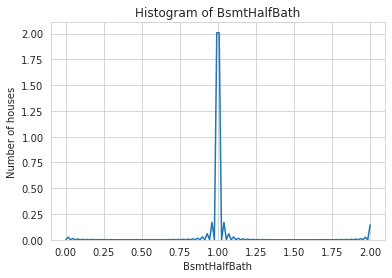

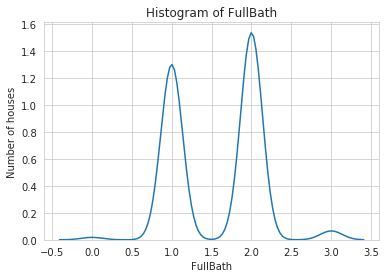

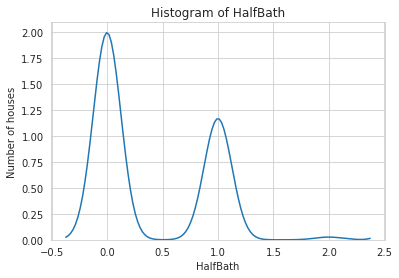

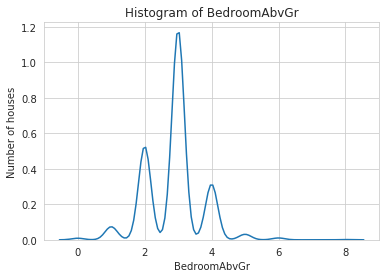

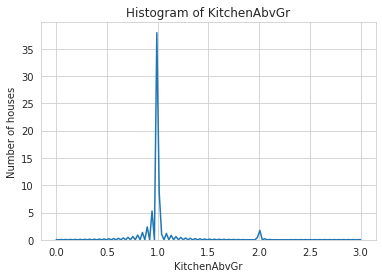

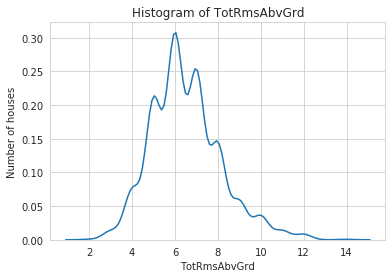

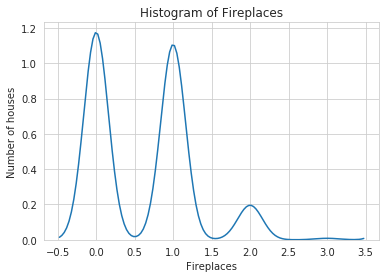

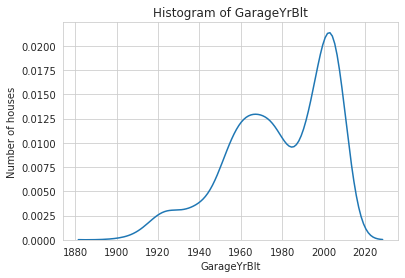

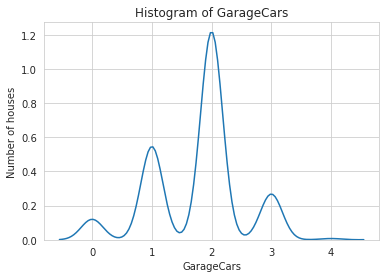

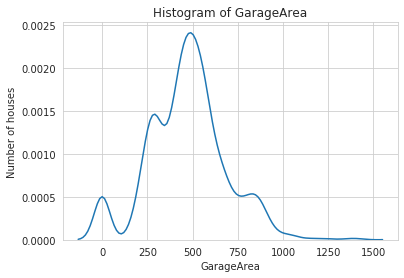

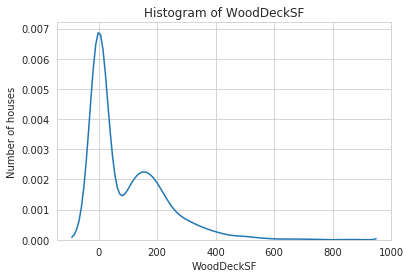

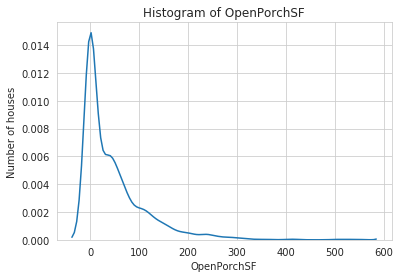

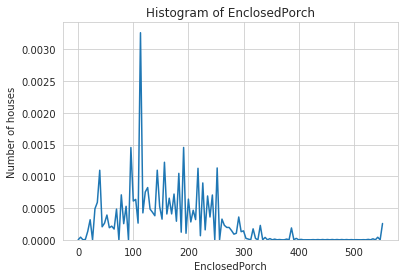

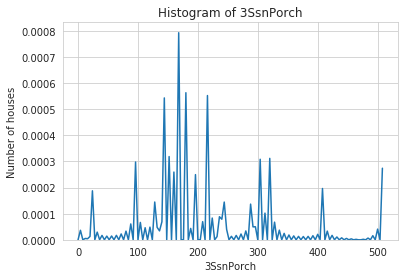

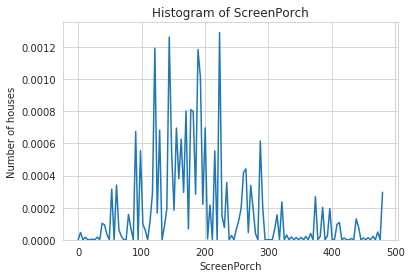

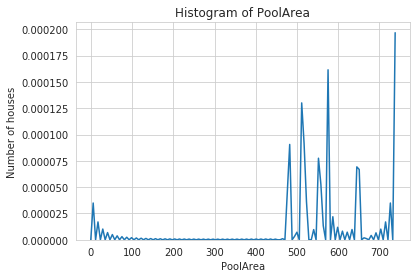

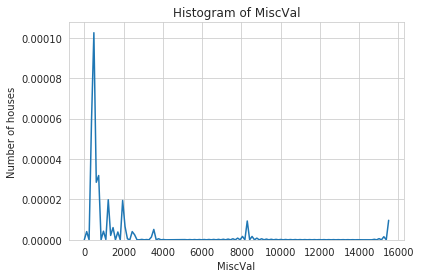

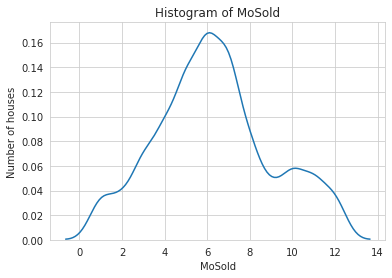

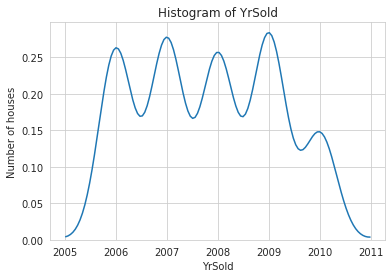

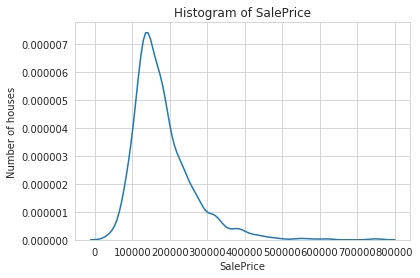

In [0]:
plot_density_hist(data, num_cols, bins = 10, rug=False, hist = False)

#### **Combine histograms and kdes**

Combining a histogram and a kde can highlight different aspects of a distribution. This is easy to do with `Seaborn`, as the code below demonstrates. In this case, the number of bins for the histogram has been increased from 10 to 20.

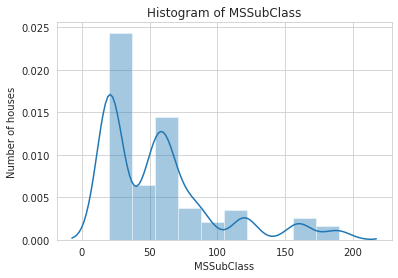

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


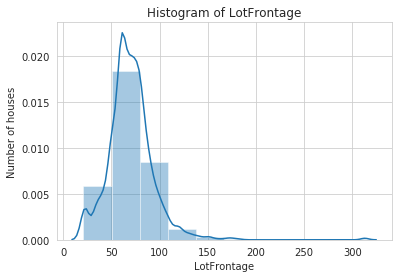

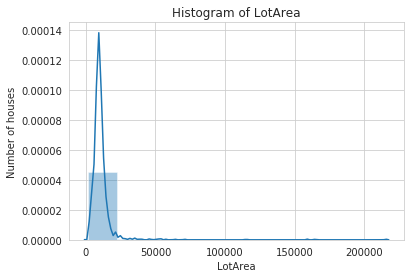

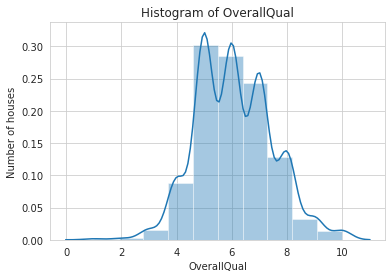

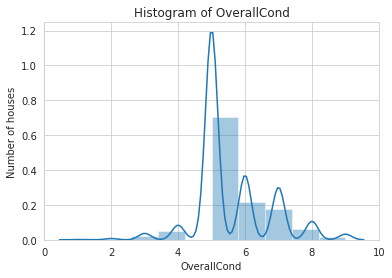

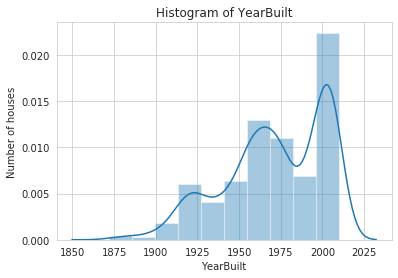

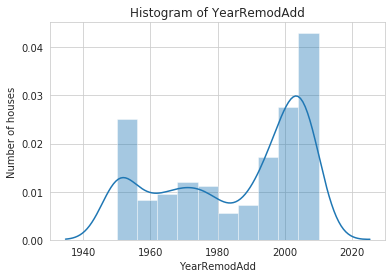

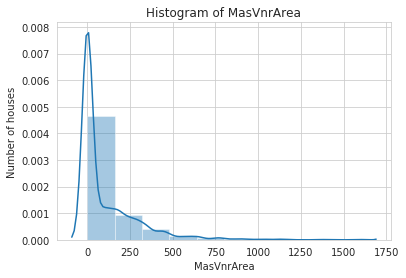

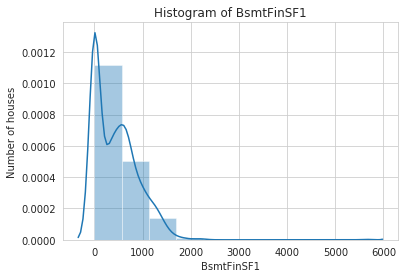

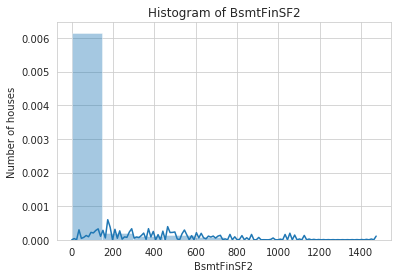

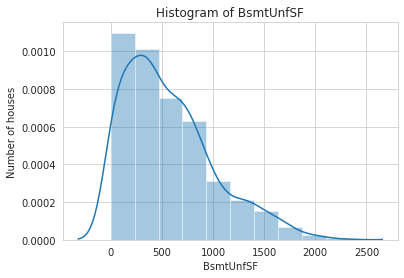

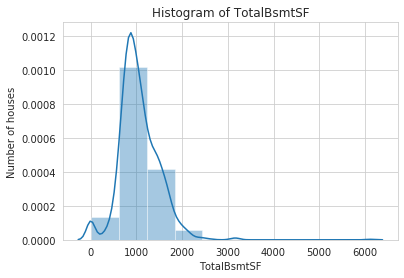

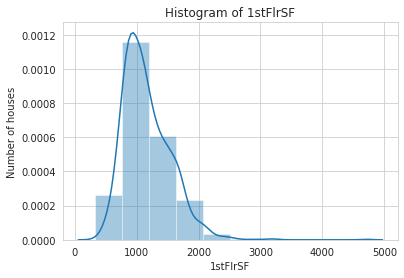

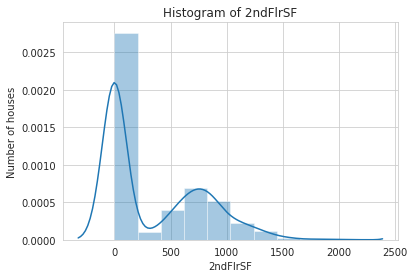

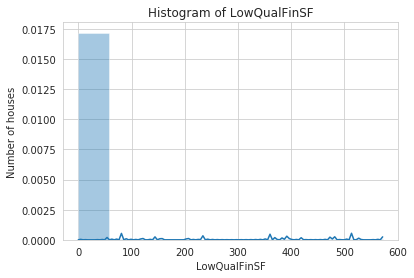

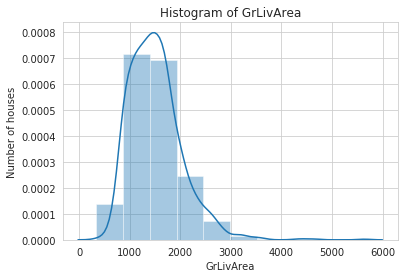

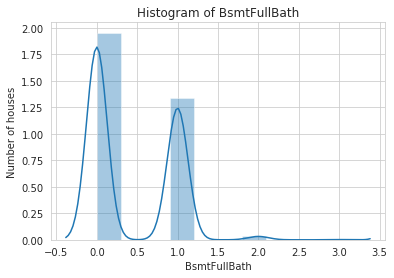

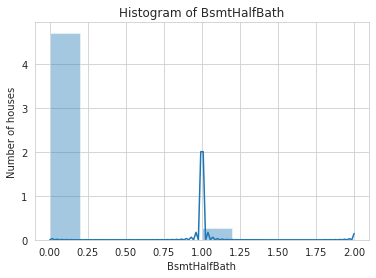

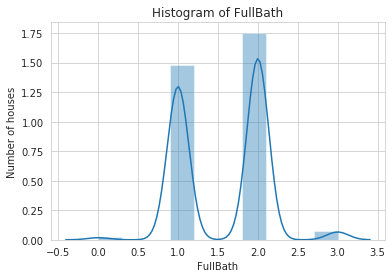

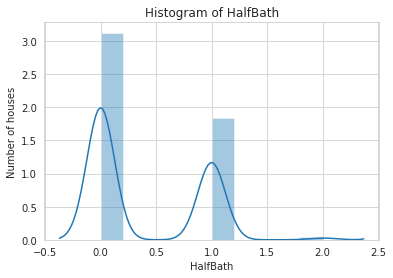

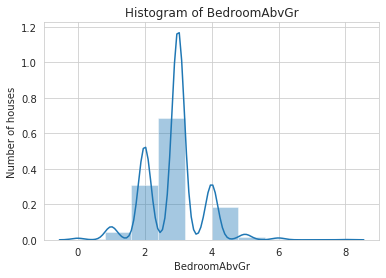

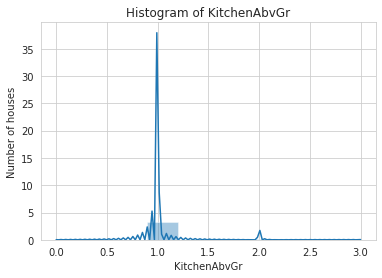

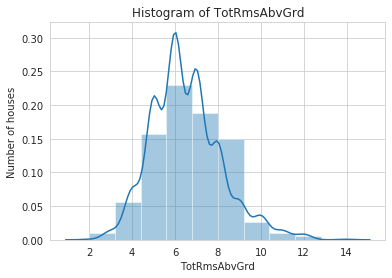

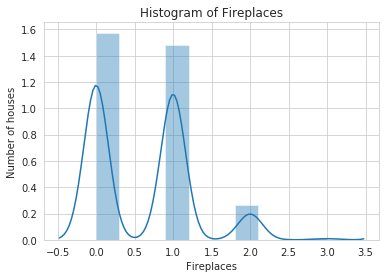

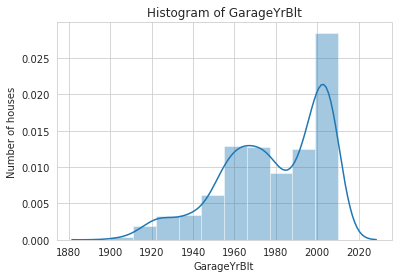

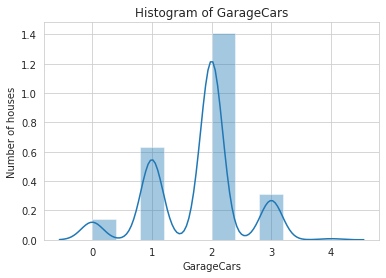

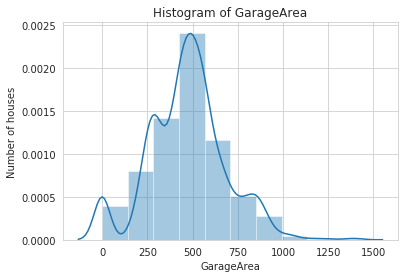

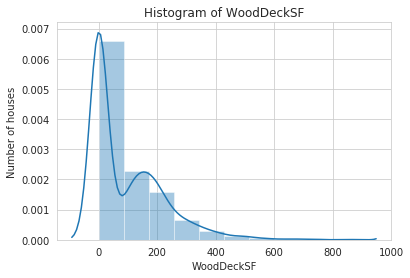

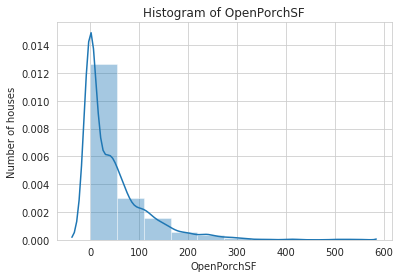

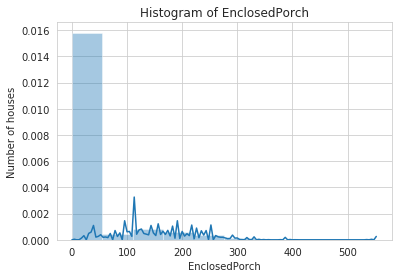

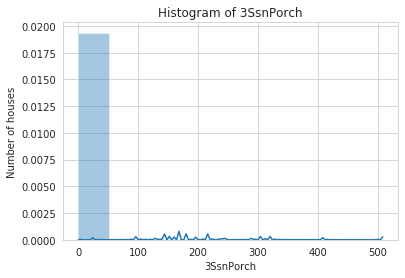

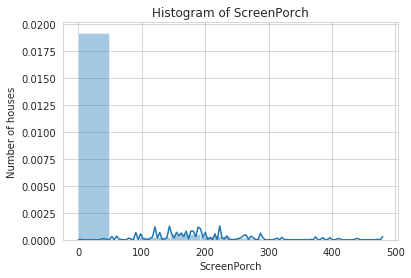

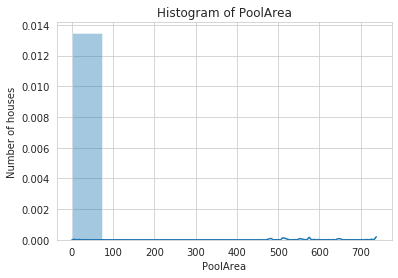

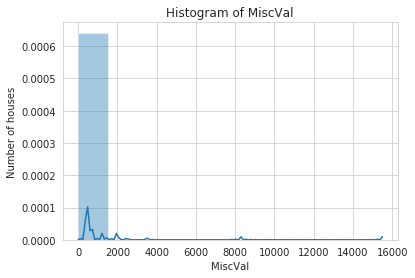

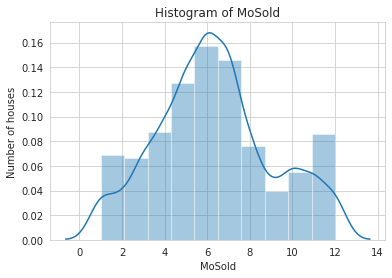

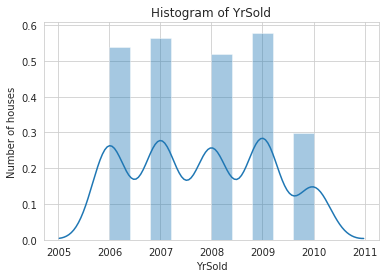

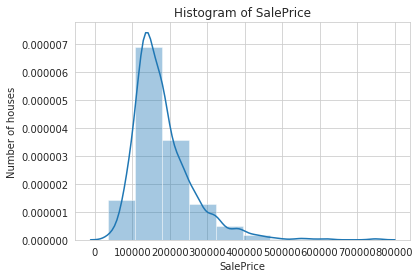

In [0]:
plot_density_hist(data, num_cols, bins = 10, rug=False, hist = True)

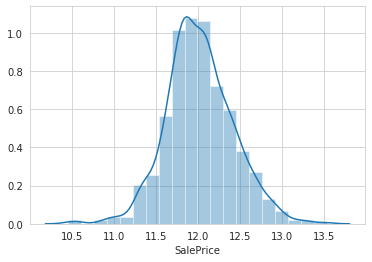

In [0]:
# taking log
sns.distplot(np.log(data['SalePrice']), bins = 20);

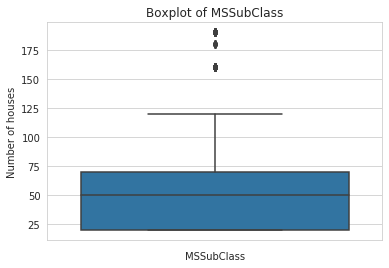

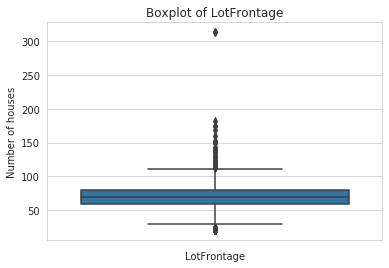

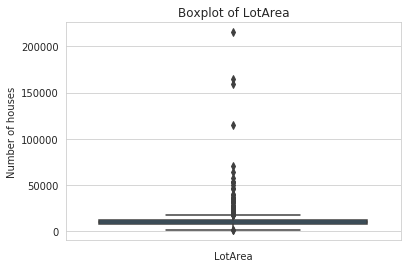

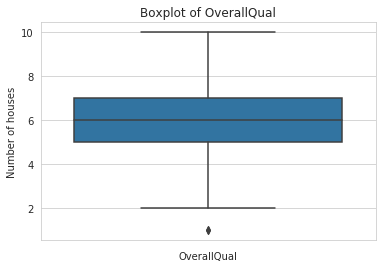

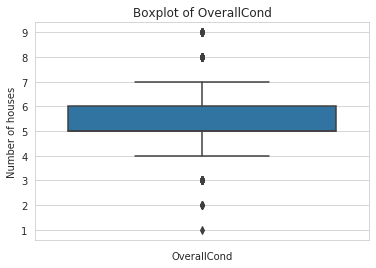

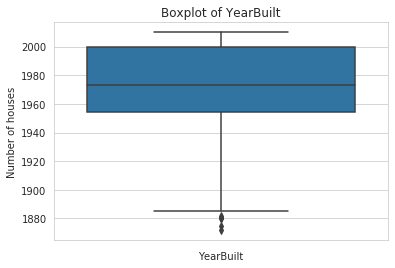

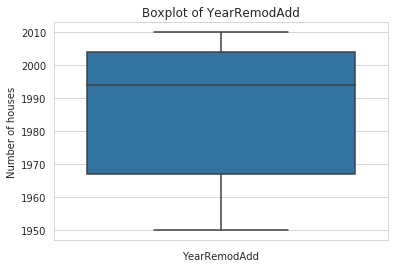

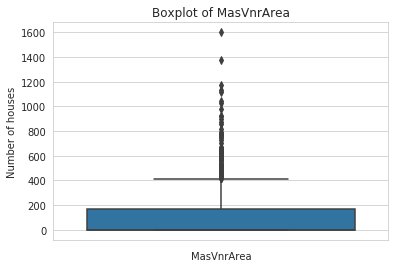

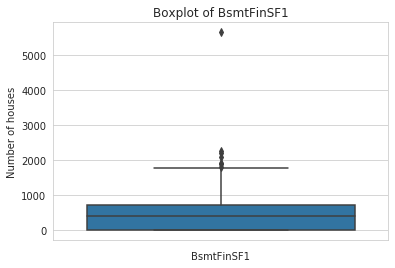

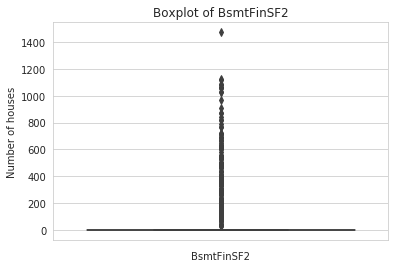

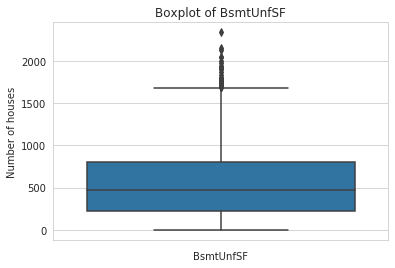

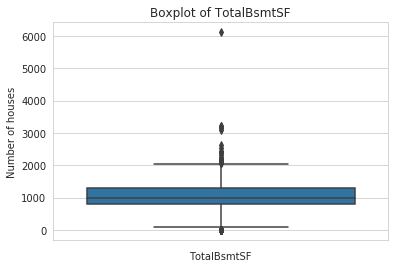

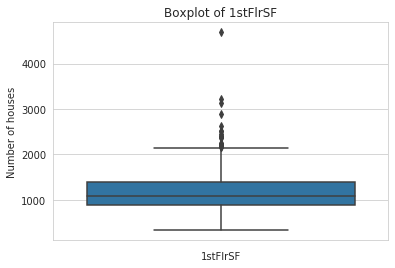

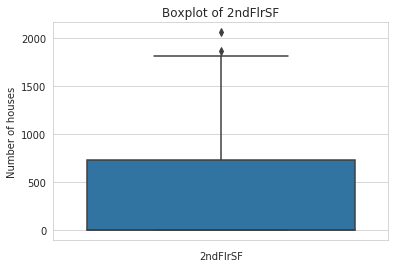

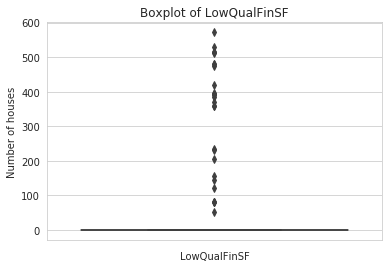

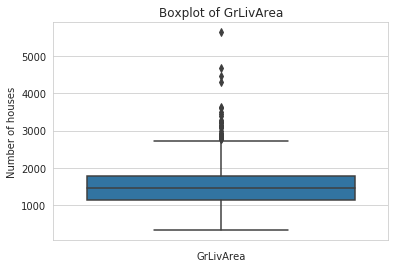

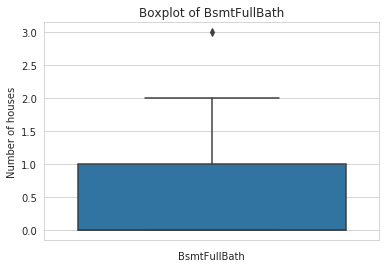

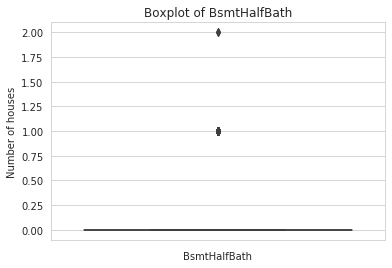

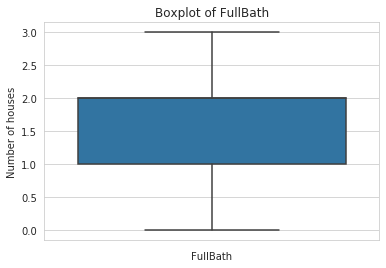

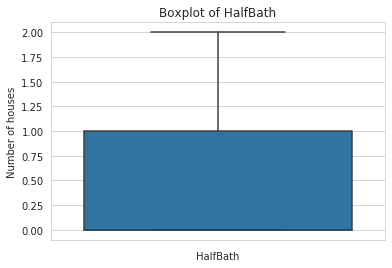

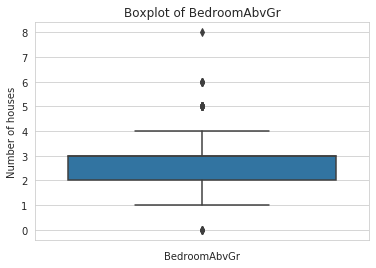

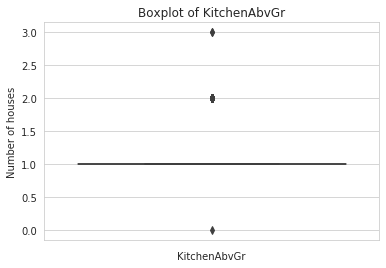

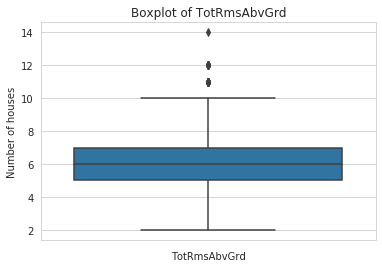

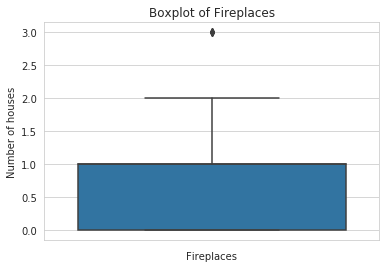

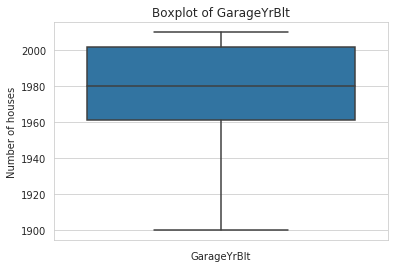

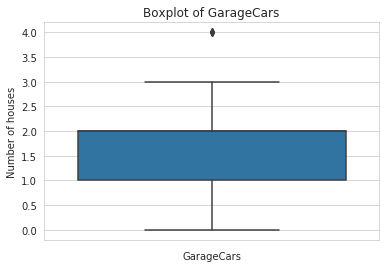

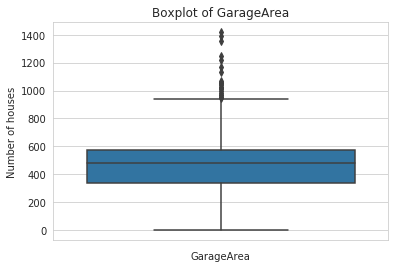

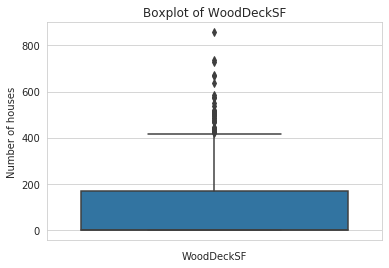

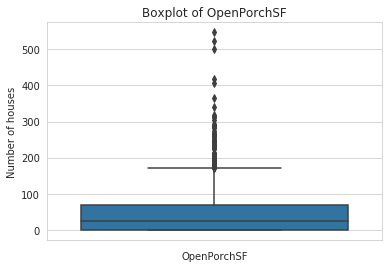

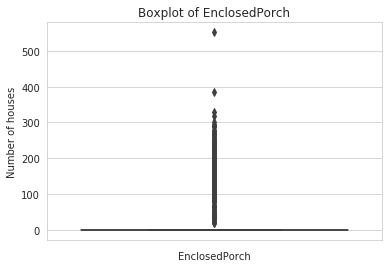

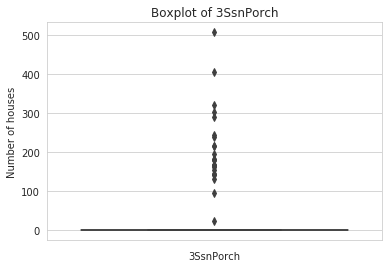

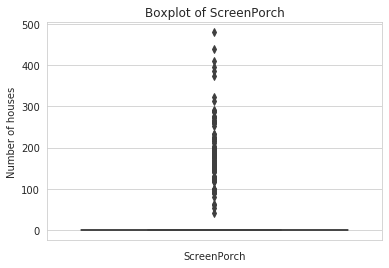

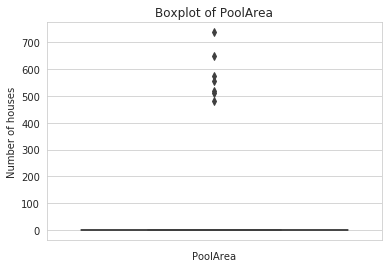

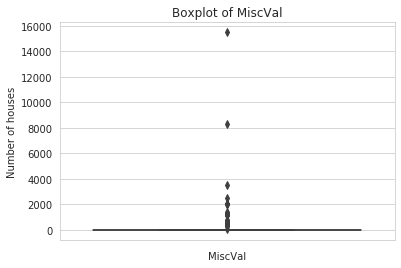

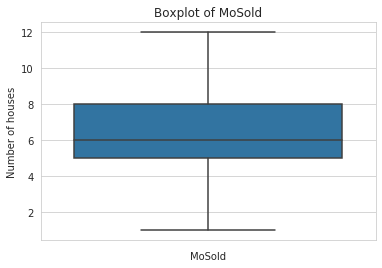

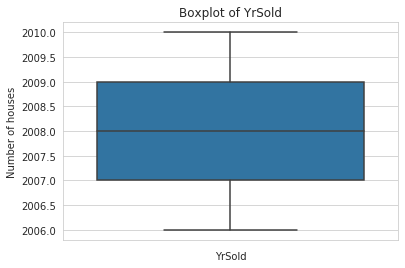

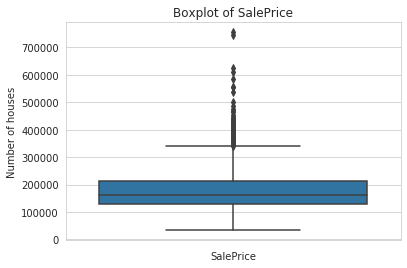

In [0]:
def plot_box(data, cols):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(y = data[col])
        plt.title('Boxplot of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of houses')# Set text for y axis
        plt.show()

plot_box(data, num_cols)

### **Bivariate analysis**

Two dimensional plots help us develop an understanding  of the **relationship between two variables**. For machine learning, the relationship of greatest interest is between the **features** and the **label**. It can also be useful to examine the relationships between features to determine if the features are co-variate or not. Such a procedure can prove more reliable than simply computing correlation when the relationship is nonlinear. 

#### **Visualize class separation by numeric features**

##### **Box Plots**

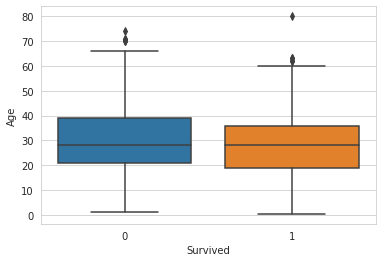

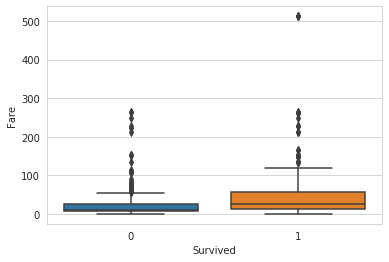

In [0]:
def plot_box(data, cols, col_x = 'Survived'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['Age', 'Fare']
plot_box(data, num_cols)

#### **Visualize class separation by categorical features**

In [0]:
data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Pclass


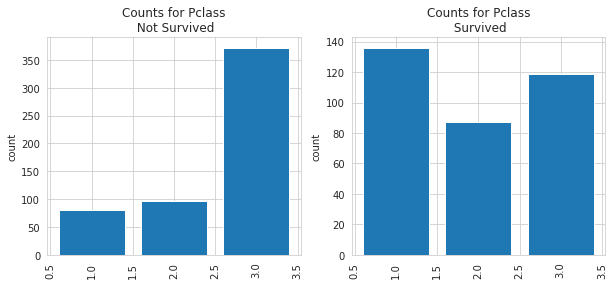

Sex


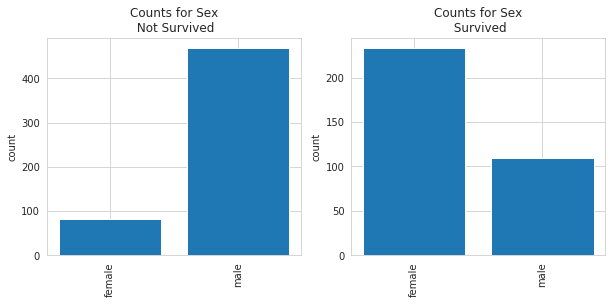

SibSp


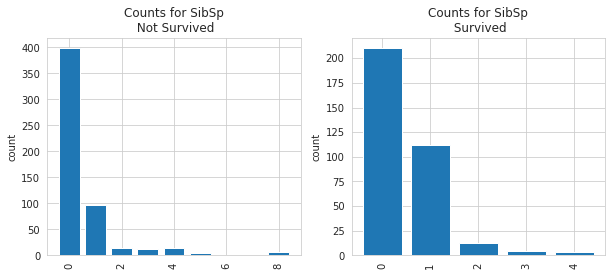

Parch


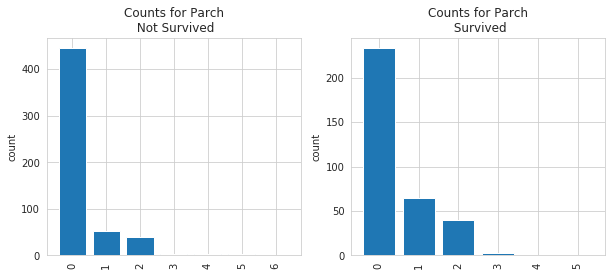

Embarked


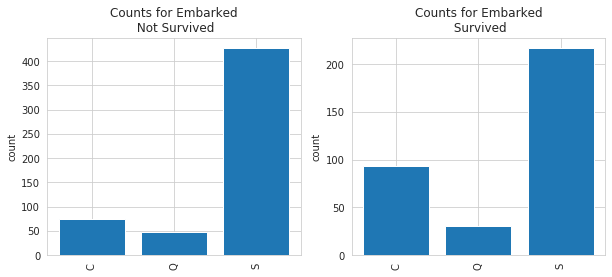

In [0]:
cat_cols = ['Pclass','Sex','SibSp','Parch','Embarked']

data['dummy'] = np.ones(shape = data.shape[0])
for col in cat_cols:
    print(col)
    counts = data[['dummy', 'Survived', col]].groupby(['Survived', col], as_index = False).count()
    #temp = counts[counts['Survived'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['Survived'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Not Survived')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['Survived'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Survived')
    plt.ylabel('count')
    plt.show()

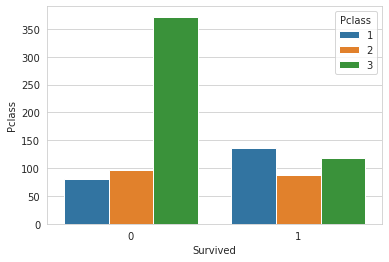

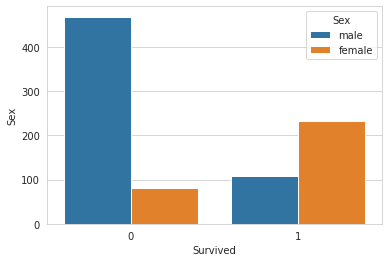

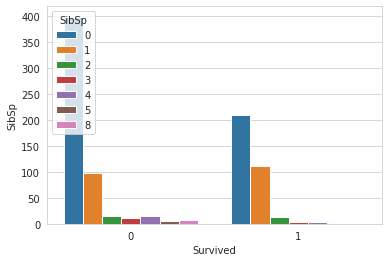

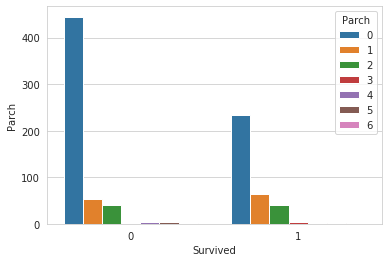

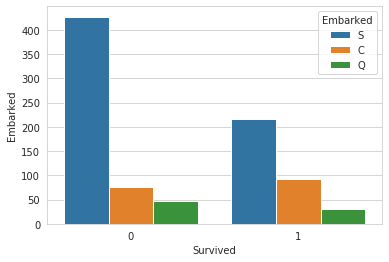

In [0]:
# Stacked bar chart
def plot_stacked(data, cols, col_x = 'Survived'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.countplot(x=col_x, hue = col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

cat_cols = ['Pclass','Sex','SibSp','Parch','Embarked']
plot_stacked(data, cat_cols)